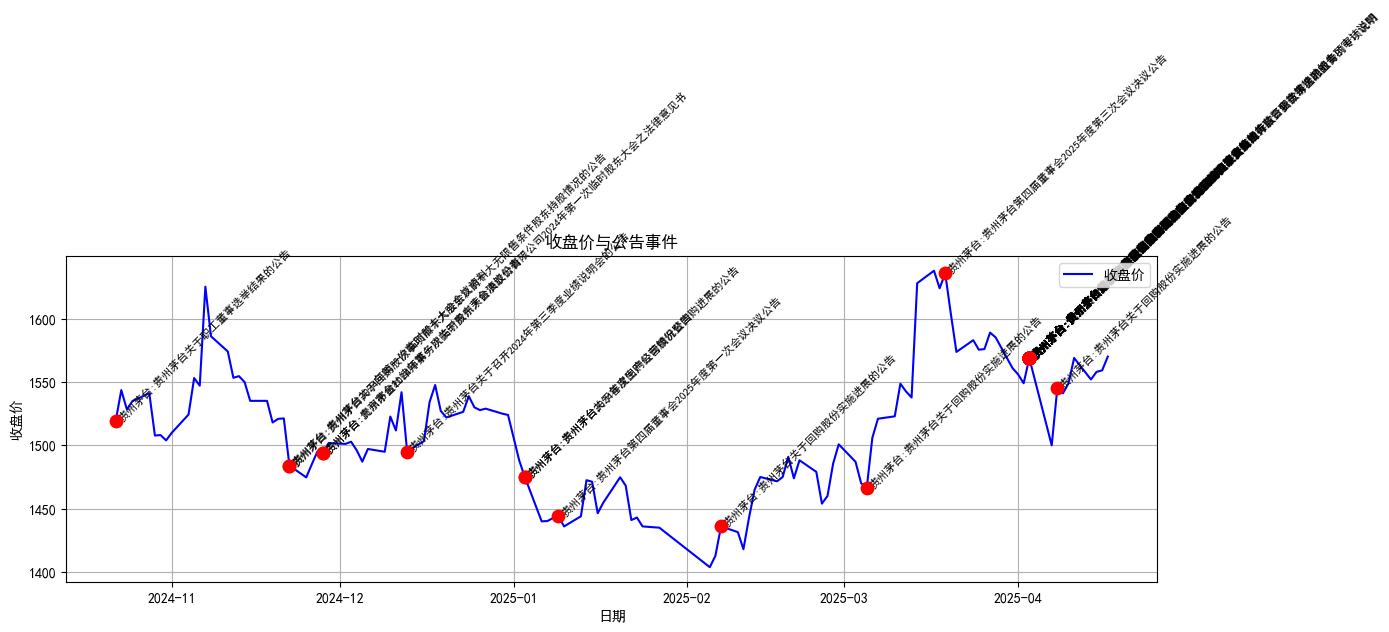

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

events_df = pd.read_csv('600519Events.csv')
df = pd.read_csv('股票K线数据_90天.csv')


df['股票代码'] = df['股票代码'].astype(str).str.replace(r'^[01]\.', '', regex=True)
df['股票代码'] = df['股票代码'].astype(str).str.ljust(6, "0")

prices_df = df[df['股票代码']=='600519']
# 假设 events_df 和 prices_df 都已经读取好，并且日期列格式为 datetime
events_df['公告日期'] = pd.to_datetime(events_df['公告日期'])
prices_df['日期'] = pd.to_datetime(prices_df['日期'])

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体，支持中文
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号

# 按时间排序，防止画图错乱
prices_df = prices_df.sort_values(by='日期')

# 开始画图
plt.figure(figsize=(14, 6))
plt.plot(prices_df['日期'], prices_df['收盘价'], label='收盘价', color='blue')

# 标注事件点
for idx, row in events_df.iterrows():
    event_date = row['公告日期']
    if event_date in prices_df['日期'].values:
        price = prices_df.loc[prices_df['日期'] == event_date, '收盘价'].values[0]
        plt.scatter(event_date, price, color='red', marker='o', s=80, zorder=5)
        plt.text(event_date, price + 0.1, row['公告标题'], fontsize=8, rotation=45)

plt.title('收盘价与公告事件')
plt.xlabel('日期')
plt.ylabel('收盘价')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
